In [20]:
import torch
from PIL import Image
from torchvision import transforms

# load model
model = torch.hub.load('hustvl/yolop', 'yolop', pretrained=True)

#inference
img = torch.randn(1,3,640,640)
img = Image.open('/tools/datasets/bdd100k/images/100k/val/b1c66a42-6f7d68ca.jpg')
img = img.resize((640, 640))
transform = transforms.Compose([transforms.ToTensor()])
img_tensor = transform(img)
img_tensor = img_tensor.unsqueeze(dim=0)
print(img_tensor.shape)

det_out, da_seg_out,ll_seg_out = model(img_tensor)

print(det_out[0].shape)
print(da_seg_out.shape)
print(ll_seg_out.shape)


Using cache found in /home/oq4116/.cache/torch/hub/hustvl_yolop_main


torch.Size([1, 3, 640, 640])
torch.Size([1, 3, 80, 80, 6])
torch.Size([1, 2, 640, 640])
torch.Size([1, 2, 640, 640])


In [30]:
print(det_out[0][0][0][0][0])

tensor([ -0.4119,  -0.7369,   0.3562,   0.3269, -15.1210,   3.9647],
       grad_fn=<SelectBackward0>)


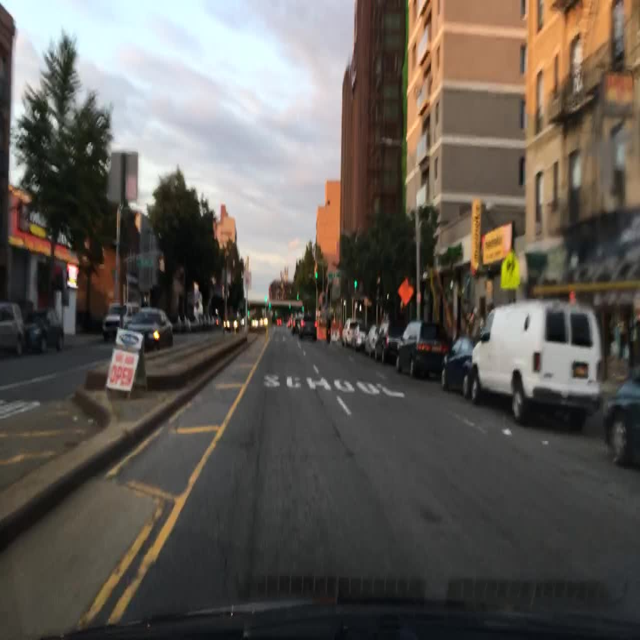

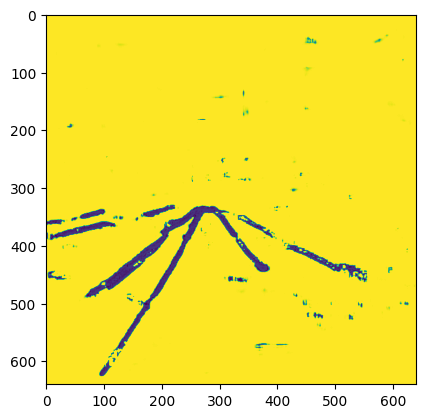

In [27]:
import matplotlib.pyplot as plt

display(img)
plt.imshow(da_seg_out[0][1].detach().numpy())
plt.imshow(ll_seg_out[0][0].detach().numpy())



In [7]:
from torchinfo import summary

yolop = summary(model, input_size=(1,3,640,640))
index = 0

for layer_info in yolop.summary_list:
    if layer_info.class_name == 'Conv2d':
        index += 1
        print(index, layer_info)

1 Conv2d: 4
2 Conv2d: 3
3 Conv2d: 4
4 Conv2d: 6
5 Conv2d: 6
6 Conv2d: 3
7 Conv2d: 3
8 Conv2d: 4
9 Conv2d: 3
10 Conv2d: 4
11 Conv2d: 6
12 Conv2d: 6
13 Conv2d: 6
14 Conv2d: 6
15 Conv2d: 6
16 Conv2d: 6
17 Conv2d: 3
18 Conv2d: 3
19 Conv2d: 4
20 Conv2d: 3
21 Conv2d: 4
22 Conv2d: 6
23 Conv2d: 6
24 Conv2d: 6
25 Conv2d: 6
26 Conv2d: 6
27 Conv2d: 6
28 Conv2d: 3
29 Conv2d: 3
30 Conv2d: 4
31 Conv2d: 3
32 Conv2d: 4
33 Conv2d: 4
34 Conv2d: 4
35 Conv2d: 6
36 Conv2d: 6
37 Conv2d: 3
38 Conv2d: 3
39 Conv2d: 4
40 Conv2d: 3
41 Conv2d: 4
42 Conv2d: 6
43 Conv2d: 6
44 Conv2d: 3
45 Conv2d: 3
46 Conv2d: 4
47 Conv2d: 3
48 Conv2d: 4
49 Conv2d: 6
50 Conv2d: 6
51 Conv2d: 3
52 Conv2d: 3
53 Conv2d: 4
54 Conv2d: 3
55 Conv2d: 4
56 Conv2d: 6
57 Conv2d: 6
58 Conv2d: 3
59 Conv2d: 3
60 Conv2d: 4
61 Conv2d: 3
62 Conv2d: 4
63 Conv2d: 6
64 Conv2d: 6
65 Conv2d: 3
66 Conv2d: 3
67 Conv2d: 4
68 Conv2d: 4
69 Conv2d: 4
70 Conv2d: 4
71 Conv2d: 3
72 Conv2d: 4
73 Conv2d: 6
74 Conv2d: 6
75 Conv2d: 3
76 Conv2d: 3
77 Conv2d: 4
78 Conv2

In [8]:
print(yolop)

Layer (type:depth-idx)                             Output Shape              Param #
MCnet                                              [1, 25200, 6]             --
├─Sequential: 1-1                                  --                        --
│    └─Focus: 2-1                                  [1, 32, 320, 320]         --
│    │    └─Conv: 3-1                              [1, 32, 320, 320]         3,520
│    └─Conv: 2-2                                   [1, 64, 160, 160]         --
│    │    └─Conv2d: 3-2                            [1, 64, 160, 160]         18,432
│    │    └─BatchNorm2d: 3-3                       [1, 64, 160, 160]         128
│    │    └─Hardswish: 3-4                         [1, 64, 160, 160]         --
│    └─BottleneckCSP: 2-3                          [1, 64, 160, 160]         --
│    │    └─Conv: 3-5                              [1, 32, 160, 160]         2,112
│    │    └─Sequential: 3-6                        [1, 32, 160, 160]         10,368
│    │    └─Conv2d: 

In [4]:
from torchvision import models
resnet50 = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

summary(resnet50, input_size=(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 1000]                 --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 256, 56, 56]          --
│    └─Bottleneck: 2-1                   [1, 256, 56, 56]          --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           4,096
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│ 